## Example: Compression

Near the bottom of [the writeup in the AMA](http://www.ams.org/publicoutreach/feature-column/fcarc-svd), they demonstrate how useful SVD is a way of compressing/uncompressing data.

This will make a good working example as any.

They assemble a `25 X 15` matrix of zeros and ones that form an image of a `0`. Per the example, there are really only different types of columns that go into constructing the bigger picture-- and thus some obvious information redundancy that we can leverage.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
a = np.ones((25, 1))

In [3]:
b = np.vstack([np.ones((5, 1)), 
               np.zeros((15, 1)),
               np.ones((5, 1))])

In [4]:
c = np.vstack([np.ones((5, 1)),
               np.zeros((3, 1)),
               np.ones((9, 1)),
               np.zeros((3, 1)),
               np.ones((5, 1))])

In [5]:
zero = np.c_[a, a, b, b, b, c, c, c, c, c, b, b, b, a, a]

zero.shape

(25, 15)

Altogether, our data looks like

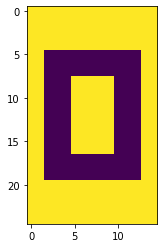

In [6]:
plt.imshow(zero);

### In Python

To perform SVD in Python, we can turn to the `numpy` implementation

In [7]:
import numpy.linalg as LA

The `svd()` function returns all three components of the righthand side of our SVD form `A = U SIGMA V.T`.

**Note**: The `vh` term is intentional as it is the [conjugate transpose](https://en.wikipedia.org/wiki/Conjugate_transpose) of our matrix `V`

In [8]:
u, s, vh = LA.svd(zero)

Inspecting, the shapes of `u` and `vh` are square and correspond to the column and row spaces, respectively.

In [9]:
u.shape, s.shape, vh.shape

((25, 25), (15,), (15, 15))

Looking at `s`, however, it's obvious that we're carrying more information than we need.

It only needed 3 singular values to reassemble the information stored in our eigen basis matricies-- the rest was simply zero and will be ignored.

In [10]:
np.set_printoptions(precision=3, suppress=True)

s

array([14.724,  5.217,  3.314,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

And so we can omit the rows/columns of our matricies accordingly.

In [11]:
U = u[:, :3]

S = s[:3]

V = vh[:3, :]

In [12]:
U.shape, S.shape, V.shape

((25, 3), (3,), (3, 15))

Finally, reassembling our original matrix using simply vectors and scalars, we have.

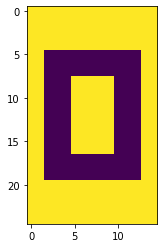

In [13]:
plt.imshow(np.dot(U * S, V));

It's worth calling out that our original representation had a number of values equal to:

In [14]:
zero.shape[0] * zero.shape[1]

375

But after paring down to just the columns, singular values, and rows that matter, we have

In [15]:
(U.shape[0] * U.shape[1]) + S.shape[0] + (V.shape[0] * V.shape[1])

123

Less than a third.